# Bank Marketing with Machine Learning Analysis

In [97]:
from IPython.display import HTML
from IPython.display import Image
Image(url= "https://csbcorrespondent.com/sites/default/files/styles/blog_feature_full/public/blog/Transactional%20Bank%20Marketing.jpg?itok=jW2vHdQS")

### Abstract:

The data set is based off the direct marketing campaigns of a Portuguese banking institution. These marketing campaigns were based on phone calls. More than one contact to a client was required, in order to know if the product (bank term deposit) was subscribed by a client or not. The dataset contains 21 columns. 

The aim is to classify whether the customer have default in the credit or not, this is done by Logistic Regression. Also, we consider multiple metrics to determine the fitness of model which were analysed using Linear and Logistic Regression. 

### Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target - Linear and Logistic Regression):

21 - nr.employed - number of employees - quarterly indicator

22 - deafult - has credit in default?

Source:https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

Dataset has 40,000+ rows of data.

### Data Exploration

Importing the pandas, seaborn, numpy, matplotlib package which is used for manupulation and visualization of data . 
Then, loaded the dataset into the dataframe (bank).

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import statsmodels
import warnings
warnings.filterwarnings('ignore')

In [99]:
bank = pd.read_csv("Marketing.csv", sep = ';')

### Exploring the data set and unique values
Pandas doesn't allow you to see all the columns at once, so we will look at them in groups of 10

In [100]:
bank[list(bank.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Pandas head() method is used to return top n (5 by default) rows of a data frame or series
##### Table Overview: The following table helps us to understand what kind of dataset we are analysing and what are the attributes included in the dataset

In [101]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Removing "unknown" values from the columns mentioned below to make the dataset to easy to work with. The "unknown" values has been filled with either "yes" or "no"

In [102]:
bank['default'].value_counts()
bank['housing'].value_counts()
bank['loan'].value_counts()
bank['default']=bank['default'].map({'no':'no','yes':'yes','unknown':'yes'})
bank['housing']=bank['housing'].map({'no':'no','yes':'yes','unknown':'yes'})
bank['loan']=bank['loan'].map({'no':'no','yes':'yes','unknown':'yes'})
bank['education'].value_counts()
bank['education']=bank['education'].map({'university.degree':'university.degree','high.school':'high.school','unknown':'not.known','basic.9y':'basic.9y','professional.course':'professional.course','basic.6y':'basic.6y','basic.4y':'basic.4y','illiterate':'illiterate'})


#### Statistical analysis of the dataset

- describe() function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
- Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [103]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [104]:
bank.isnull().values.any() 

False

There are no null values in the dataset. Next, proceeding with correlation. 

### Correlation of variables:

The term "correlation" refers to a mutual relationship or association between quantities. In almost any business, it is useful to express one quantity in terms of its relationship with others

The correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. if r>0 higher the correlation and if r<0 correlation is inversely related

- Correlation is a statistical measure that describes the association between random variables. 

###### Table Overview:- Gives the Correlated values of each column with each other in a dataframe

In [105]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


#### Plotting highly correlated columns using heatmap:

A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

The below is a two-dimensional plot of values which are mapped to the columns of the dataset.

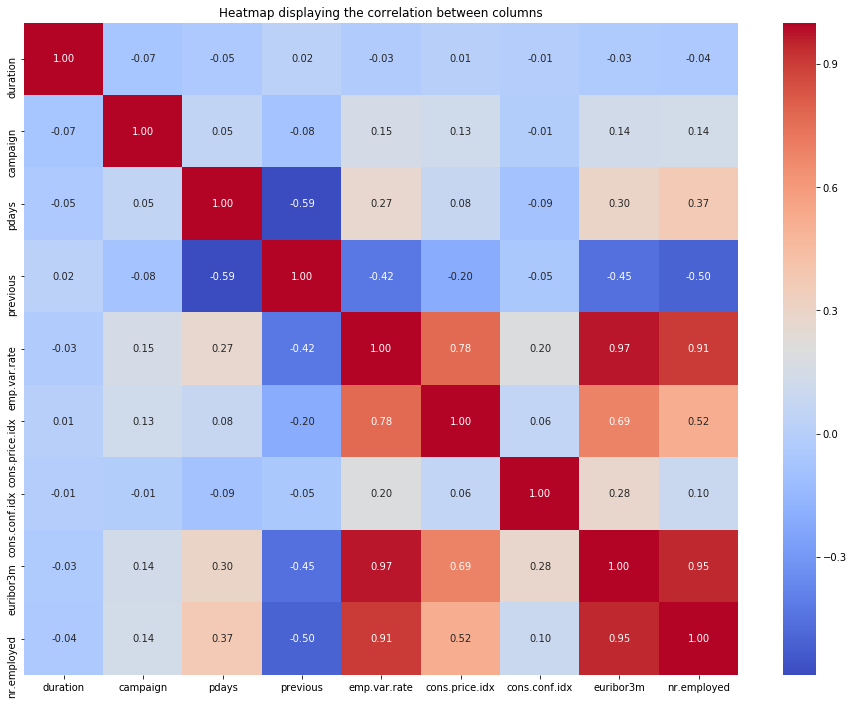

In [106]:
plt.figure(figsize=(16,12))
ax=plt.axes()
sns.heatmap(data=bank.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title("Heatmap displaying the correlation between columns")
plt.show()

#### From the above heatmap, we can conclude the following factors are correlated with the "nr.employed" positively:
##### r>0:
1. "emp.var.rate" 
2. "cons.price.idx"
3. "euribor3m" 

In [107]:
x = bank[['nr.employed','emp.var.rate','cons.price.idx','euribor3m']]

#### Displaying the correlation of the factors that are correlated with "nr.employed" positively using heatmap:

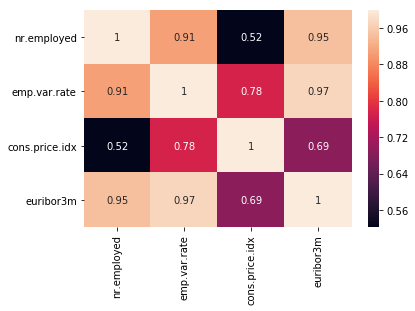

In [108]:
sns.heatmap(x.corr(), annot=True)

In [109]:
import sklearn.utils
bank = sklearn.utils.shuffle(bank)

In [110]:
# choose attributes which shows relation
x = bank[['nr.employed','emp.var.rate','euribor3m']]

#### Pairplot
Pair plot (also known as scatterplot matrix). In a pair plot, we can see the distribution for both of the single variables and relationships between two variables(Here nr.employed, emp.var.rate, euribor3m). 

The histogram on the diagonal gives us the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

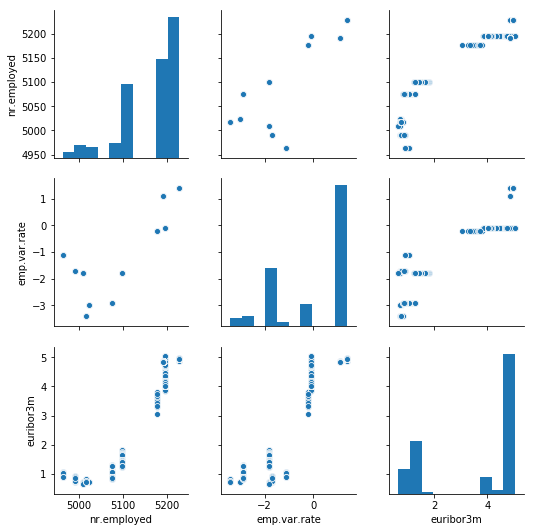

In [111]:
sns.pairplot(x)

In [112]:
x.corr()

,nr.employed,emp.var.rate,euribor3m
nr.employed,1.000000,0.906970,0.945154
emp.var.rate,0.906970,1.000000,0.972245
euribor3m,0.945154,0.972245,1.000000


In [113]:
import sklearn.utils
bank = sklearn.utils.shuffle(bank)

### Data Modeling(Linear Regression and Logistic Regression)

Since we know from above given Dataset that columns have non-numeric values , we need to convert it into numeric values, so that we can run different machine learning algorithms on it in order to run analysis. 

Here, we are using one-hot encoding method

### One-hot Encoding

- Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding
- One hot encoding takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

In [114]:
f1=['job','marital','education','housing','loan','default','y']
f2=['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed']
x=bank[f1]
x_cat=pd.get_dummies(x)
x_num=bank[f2]
#print(xtr.head(5))
feature_final1=['job','marital','education','housing','loan','default','age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','y','nr.employed']

#### Graphical representation of Categorical features:

In [115]:
DF=pd.concat([x_num,x_cat], axis=1)
DF1=DF
DF2=DF

print(DF.head(5))


       age  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
3421    29         2           1.1          93.994          -36.4   
9336    37         1           1.4          94.465          -41.8   
27302   29         1          -0.1          93.200          -42.0   
39734   92         3          -1.8          93.876          -40.0   
3184    49         1           1.1          93.994          -36.4   

       nr.employed  job_admin.  job_blue-collar  job_entrepreneur  \
3421        5191.0           0                0                 0   
9336        5228.1           0                0                 0   
27302       5195.8           1                0                 0   
39734       5008.7           0                0                 0   
3184        5191.0           0                0                 0   

       job_housemaid  ...    education_professional.course  \
3421               0  ...                                0   
9336               0  ...                     

### Linear Regression 

****Linear regression**** is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 
The case of one explanatory variable is called ***simple linear regression***. For more than one explanatory variable, the process is called ***multiple linear regression.***

#### Linear Regression: Model 1

- Target variable - "number of employees"
- Number of employees is predicted using Linear regression modeling
- Dataset is divided into test_data and train_data

In [116]:
df1_lin=DF1
print(df1_lin.shape)

(41188, 38)


In [117]:
y_label_1=df1_lin['nr.employed']
print(y_label_1.shape)
print(df1_lin.shape)

(41188,)
(41188, 38)


In [118]:
df1_lin.drop(['nr.employed'],axis=1,inplace=True)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(df1_lin, y_label_1, test_size = 0.3, random_state = 0)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.922500
value of Accuracy_test:  0.920286


Accuracy of model 1: 92.26%

#### k-fold Cross-validation: 

- In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data 
- The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used, but in general k remains an unfixed parameter.

In [120]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.9223113721303704


Cross-validation accuracy: 92.24%

****Linear Regression is applied on the dataset and Root mean square error and Mean Squared log error are calculated as below:****

Root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSE represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called *****residuals***** when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample.

Mean Squared Error is a measure of how close a fitted line is to data points. It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.

rmse_train: 20.102035481926453 msle_train: 1.5507504775904688e-05
rmse_test: 20.426605838374414 msle_test: 1.6030647990785725e-05


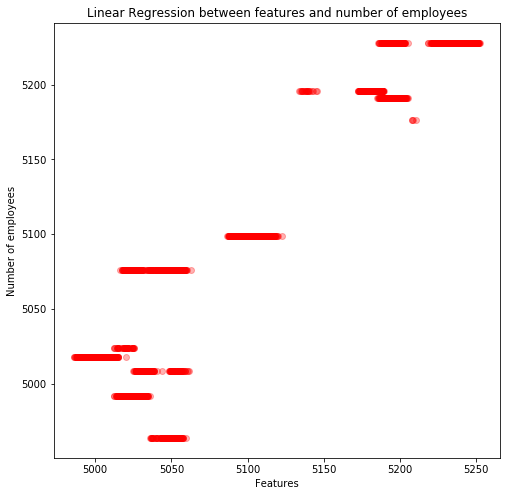

In [121]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
plt.figure(figsize=(8,8))
plt.scatter(test_pred_Y ,y_test ,alpha = 0.3, color='red')
plt.xlabel('Features')
plt.ylabel('Number of employees')
plt.title('Linear Regression between features and number of employees')
plt.show()

#### Calculation of metrics affecting linear regression

****1. R-squared**** is a statistical measure that’s used to assess the goodness of fit of our regression model.

In [122]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_train)

print("value of r-squared score:%10f"% r2_score(y_train,y_pred))

value of r-squared score:  0.922500


****2. Summary of OLS Regression : AIC, BIC and adjusted R-squared****

In [123]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
regr = OLS(y_train, X_train).fit()
regr.summary()

#https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nr.employed   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.143e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:51:08   Log-Likelihood:            -1.2743e+05
No. Observations:               28831   AIC:                         2.549e+05
Df Residuals:                   28800   BIC:                         2.552e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0321      0.015     -2.191      0.028      -0.061      -0.003
campaign                          0.1788      0.044      4.053      0.000       0.092       0.265
emp.var.rate                     59.0361      0.134    440.285      0.000      58.773      59.299
cons.price.idx                  -59.1505      0.338   -174.745      0.000     -59.814     -58.487
cons.conf.idx                    -1.8364      0.027    -67.262      0.000      -1.890      -1.783
job_admin.                      358.9218      1.102    325.697      0.000     356.762     361.082
job_blue-collar                 360.6388      1.118    322.492      0.000     358.447     362.831
job_entrepreneur                364.9382      1.228    297.189      0.000     362.531     367.345
job_housemaid                   358.8964      1.282    279.909      0.000     356.383     361.410
job_management                  362.5008      1.162    311.876      0.000     360.223     364.779
job_retired                     357.6085      1.256    284.612      0.000     355.146     360.071
job_self-employed               361.7753      1.227    294.813      0.000     359.370     364.181
job_services                    360.2810      1.143    315.105      0.000     358.040     362.522
job_student                     355.1758      1.383    256.860      0.000     352.465     357.886
job_technician                  357.3539      1.104    323.563      0.000     355.189     359.519
job_unemployed                  361.7810      1.294    279.687      0.000     359.246     364.316
job_unknown                     361.4463      1.637    220.841      0.000     358.238     364.654
marital_divorced               1080.7331      3.282    329.322      0.000    1074.301    1087.165
marital_married                1080.2905      3.265    330.821      0.000    1073.890    1086.691
marital_single                 1079.4166      3.272    329.869      0.000    1073.003    1085.830
marital_unknown                1080.8776      3.815    283.288      0.000    1073.399    1088.356
education_basic.4y              539.3771      1.782    302.683      0.000     535.884     542.870
education_basic.6y              540.2402      1.801    299.948      0.000     536.710     543.770
education_basic.9y              540.1406      1.763    306.304      0.000     536.684     543.597
education_high.school           540.1313      1.760    306.951      0.000     536.682     543.580
education_illiterate            544.1148      4.983    109.192      0.000     534.348     553.882
education_not.known             539.8296      1.832    294.721      0.000     536.239     543.420
education_professional.course   539.0915      1.772    304.306      0.000     535.619     542.564
education_university.degree     538.3927     

### Conclusion from model 1

Is the relationship significant?   
Does the model make sense? Interpret the meaning of each independent variable.   
Cross-validate the model. How well did it do? 


1. We can conclude that the model captures 92% variance of dependent variable, which is good and hence model is significant

2. Features like Age, campaign, marital, job, housing, loan, default, etc. have small p-values, whereas Education have a large p-value
 - Reject the null hypothesis for Age, campaign, marital, job, housing, loan and default. Hence, there is association between      features and Number of employees
 - Fail to reject the null hypothesis for Education. Hence, there is no association between Education and Number of Employees

3. The model has cross-validated and it did pretty well with accuracy of 92%

This model has a R-squared (0.922)

#### Regression Model assumptions:

****1. Linearity & Equal variance****

Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

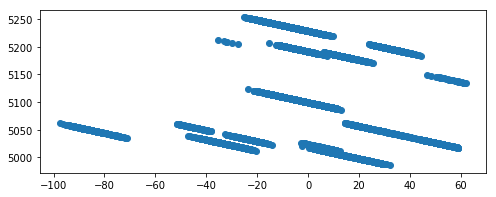

In [124]:
fig,ax=plt.subplots(figsize=(8,3))
residual=y_train-y_pred
_=ax.scatter(residual,y_pred)

It seems like the corresponding residual plot is reasonably random. 

****2. To confirm that, let’s go with a hypothesis test, Breusch-Pagan test, for linearity****

In [125]:
import statsmodels.stats.api as sms
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, X_train)
pval, f_pval

(0.0, 0.0)

Small p-value (pval below) shows that there is violation of homoscedasticity.
Usually assumption violations are not independent of each other. Having one violations may lead to another. In this case, we see that both linearity and homoscedasticity are not met.

****3. Normality****

We apply normality probability plot to assess how the data (error) depart from normality visually.

0.8910927986721315

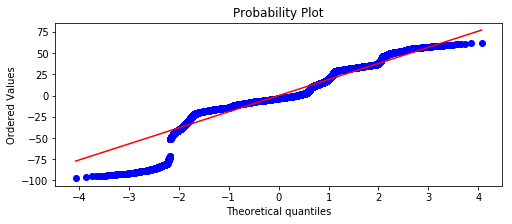

In [126]:
import scipy as sp
fig,ax=plt.subplots(figsize=(8,3))
_,(_,_,r)=sp.stats.probplot(residual,plot=ax, fit=True)
r**2

The good fit indicates that normality is a reasonable approximation

#### Linear Regression - Model 2

In [127]:
df2_lin=DF2.drop(['loan_no', 'loan_yes','cons.price.idx','cons.conf.idx'],axis=1, inplace=False)

In [128]:
y_label_2=bank['nr.employed']
print(y_label_2.shape)
print(df2_lin.shape)

(41188,)
(41188, 33)


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(df2_lin, y_label_2, test_size = 0.3, random_state = 0)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.836262
value of Accuracy_test:  0.826938


Accuracy of model 2: 83.4%

In [130]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.8358876645420704


Cross-validation accuracy: 83.28%

rmse_train: 29.21889561636613 msle_train: 3.310564986461693e-05
rmse_test: 30.097522697812256 msle_test: 3.516039953152383e-05


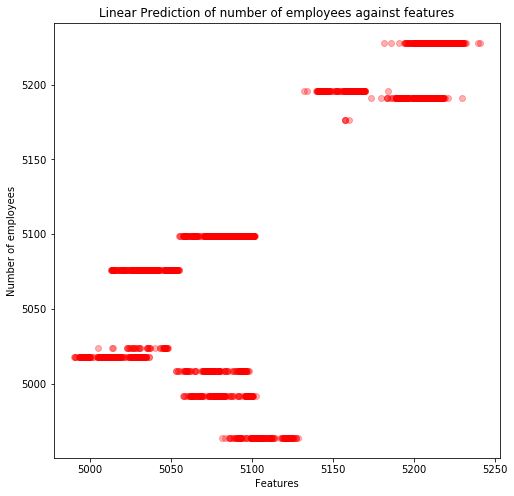

In [131]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(abs(train_pred_Y), abs(y_train))
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(abs(test_pred_Y), abs(y_test))

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
plt.figure(figsize=(8,8))
plt.scatter(test_pred_Y ,y_test ,alpha = 0.3, color='red')
plt.xlabel('Features')
plt.ylabel('Number of employees')
plt.title("Linear Prediction of number of employees against features")
plt.show()

#### Calculation of metrics affecting linear regression

****1. R-square****

In [132]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_train)

print("value of r-squared score:%10f"% r2_score(y_train,y_pred))

value of r-squared score:  0.836262


****2. Summary of OLS Regression : AIC, BIC and adjusted R-squared****

In [133]:
regr = OLS(y_train, X_train).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nr.employed   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     5448.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:51:16   Log-Likelihood:            -1.3821e+05
No. Observations:               28831   AIC:                         2.765e+05
Df Residuals:                   28803   BIC:                         2.767e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0990      0.021     -4.666      0.000      -0.141      -0.057
campaign                          0.1534      0.064      2.395      0.017       0.028       0.279
emp.var.rate                     40.0860      0.119    335.462      0.000      39.852      40.320
job_admin.                      220.5717      0.454    486.198      0.000     219.682     221.461
job_blue-collar                 222.1376      0.497    446.597      0.000     221.163     223.113
job_entrepreneur                226.1113      0.881    256.737      0.000     224.385     227.838
job_housemaid                   220.2376      1.056    208.508      0.000     218.167     222.308
job_management                  223.8820      0.685    326.916      0.000     222.540     225.224
job_retired                     213.7668      0.933    229.035      0.000     211.937     215.596
job_self-employed               223.2830      0.898    248.613      0.000     221.523     225.043
job_services                    221.9591      0.616    360.087      0.000     220.751     223.167
job_student                     205.2208      1.193    172.000      0.000     202.882     207.559
job_technician                  221.5993      0.540    410.306      0.000     220.541     222.658
job_unemployed                  219.2721      1.043    210.310      0.000     217.229     221.316
job_unknown                     217.2445      1.781    121.950      0.000     213.753     220.736
marital_divorced                658.8302      0.975    675.992      0.000     656.920     660.741
marital_married                 658.6812      0.899    732.552      0.000     656.919     660.444
marital_single                  657.2335      0.907    724.615      0.000     655.456     659.011
marital_unknown                 660.5409      3.041    217.178      0.000     654.579     666.502
education_basic.4y              325.8250      1.073    303.657      0.000     323.722     327.928
education_basic.6y              327.8559      1.148    285.690      0.000     325.607     330.105
education_basic.9y              328.1488      1.025    320.221      0.000     326.140     330.157
education_high.school           327.7376      1.006    325.849      0.000     325.766     329.709
education_illiterate            346.2294      6.906     50.132      0.000     332.693     359.766
education_not.known             323.6525      1.202    269.299      0.000     321.297     326.008
education_professional.course   327.2333      1.065    307.198      0.000     325.145     329.321
education_university.degree     328.6033      1.005    326.808      0.000     326.633     330.574
housing_no                     1317.0586      0.468   2813.560      0.000    1316.141    1317.976
housing_yes                    1318.2272     

### Conclusion from model 2

Is the relationship significant?   
Does the model make sense? Interpret the meaning of each independent variable.   
Cross-validate the model. How well did it do? 


1. We can conclude that the model captures 83.2% variance of dependent variable, which is good and hence model is significant

2. Features like Age, marital, job, housing, loan, default, etc. have small p-values
 - Reject the null hypothesis for Age, marital, job, housing, loan and default, etc. Hence, there is association between features and Number of employees

3. The model has cross-validated and it did pretty well with accuracy of 83%

This model has a R-squared (0.83)

#### Regression Model assumptions:

****1. Linearity & Equal variance****

Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

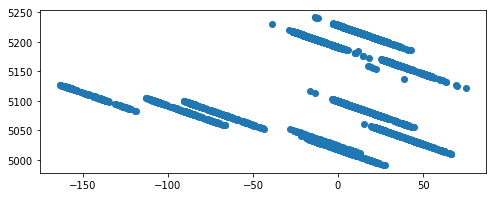

In [134]:
fig,ax=plt.subplots(figsize=(8,3))
residual=y_train-y_pred
_=ax.scatter(residual,y_pred)

It seems like the corresponding residual plot is reasonably random. 

****2. To confirm that, let’s go with a hypothesis test, Breusch-Pagan test, for linearity****

In [135]:
import statsmodels.stats.api as sms
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, X_train)
pval, f_pval

(0.0, 0.0)

Small p-value (pval below) shows that there is violation of homoscedasticity. Usually assumption violations are not independent of each other. Having one violations may lead to another. In this case, we see that both linearity and homoscedasticity are not met.

****3. Normality****

We apply normality probability plot to assess how the data (error) depart from normality visually.

0.7445068262203376

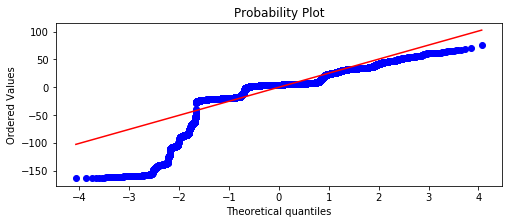

In [136]:
import scipy as sp
fig,ax=plt.subplots(figsize=(8,3))
_,(_,_,r)=sp.stats.probplot(residual,plot=ax, fit=True)
r**2

The average fit indicates that normality is an average approximation

### Linear Regression - Model 3

In [137]:
DF3=DF
df3_lin=DF3.drop(['marital_divorced','marital_single','marital_unknown','marital_married'],axis=1, inplace=False)

In [138]:
y_label_3=bank['nr.employed']
print(y_label_3.shape)
print(df3_lin.shape)

(41188,)
(41188, 33)


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(df3_lin, y_label_3, test_size = 0.3, random_state = 0)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.922472
value of Accuracy_test:  0.920261


Accuracy of model 3: 92.14%

In [140]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.9223143363957226


Cross-validation accuracy: 92.12%

rmse_train: 20.10566605036944 msle_train: 1.5513679597907123e-05
rmse_test: 20.42989745929268 msle_test: 1.6036660205089898e-05


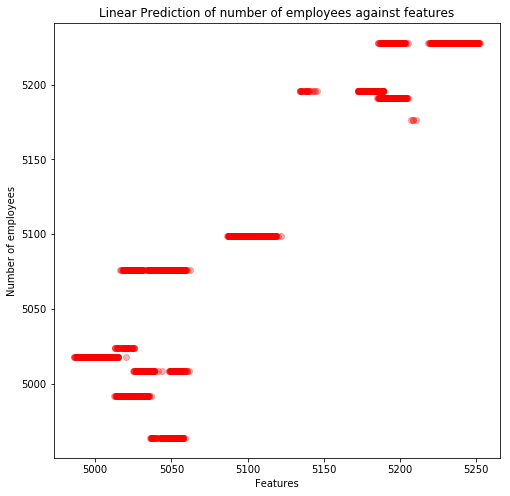

In [141]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
plt.figure(figsize=(8,8))
plt.scatter(test_pred_Y ,y_test ,alpha = 0.3, color='red')
plt.xlabel('Features')
plt.ylabel('Number of employees')
plt.title("Linear Prediction of number of employees against features")
plt.show()

#### Calculation of metrics affecting linear regression

****1. R-square:****

In [142]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_train)

print("value of r-squared score:%10f"% r2_score(y_train,y_pred))

value of r-squared score:  0.922472


****2. Summary of OLS Regression : AIC, BIC and adjusted R-squared****

In [143]:
regr = OLS(y_train, X_train).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nr.employed   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:51:23   Log-Likelihood:            -1.2743e+05
No. Observations:               28831   AIC:                         2.549e+05
Df Residuals:                   28803   BIC:                         2.552e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0144      0.014     -1.055      0.291      -0.041       0.012
campaign                          0.1781      0.044      4.038      0.000       0.092       0.265
emp.var.rate                     59.0581      0.134    440.975      0.000      58.796      59.321
cons.price.idx                  -59.1602      0.338   -174.787      0.000     -59.824     -58.497
cons.conf.idx                    -1.8365      0.027    -67.333      0.000      -1.890      -1.783
job_admin.                      399.6883      1.218    328.089      0.000     397.300     402.076
job_blue-collar                 401.4576      1.233    325.605      0.000     399.041     403.874
job_entrepreneur                405.8212      1.333    304.375      0.000     403.208     408.435
job_housemaid                   399.7304      1.383    288.946      0.000     397.019     402.442
job_management                  403.3626      1.272    316.998      0.000     400.869     405.857
job_retired                     398.2535      1.362    292.406      0.000     395.584     400.923
job_self-employed               402.5818      1.332    302.133      0.000     399.970     405.194
job_services                    401.0968      1.256    319.325      0.000     398.635     403.559
job_student                     395.6287      1.478    267.592      0.000     392.731     398.527
job_technician                  398.1033      1.219    326.654      0.000     395.715     400.492
job_unemployed                  402.6073      1.396    288.482      0.000     399.872     405.343
job_unknown                     402.1676      1.718    234.038      0.000     398.799     405.536
education_basic.4y              600.5171      1.947    308.482      0.000     596.701     604.333
education_basic.6y              601.4479      1.964    306.303      0.000     597.599     605.297
education_basic.9y              601.3151      1.929    311.715      0.000     597.534     605.096
education_high.school           601.2715      1.926    312.180      0.000     597.496     605.047
education_illiterate            605.2858      5.046    119.958      0.000     595.396     615.176
education_not.known             600.9396      1.994    301.405      0.000     597.032     604.848
education_professional.course   600.2486      1.936    309.979      0.000     596.453     604.044
education_university.degree     599.4738      1.906    314.483      0.000     595.738     603.210
housing_no                     2405.8627      7.149    336.520      0.000    2391.850    2419.876
housing_yes                    2404.6365      7.137    336.933      0.000    2390.648    2418.625
loan_no                        2405.1807      7.143    336.740      0.000    2391.181    2419.180
loan_yes                       2405.3185     

### Conclusion from model 3

Is the relationship significant?
Does the model make sense? Interpret the meaning of each independent variable.
Cross-validate the model. How well did it do? 

1. We can conclude that the model captures 92.1% variance of dependent variable, which is good and hence model is significant
2. Features like marital, job, housing, loan, default, etc. have small p-values
 - Reject the null hypothesis for Age, marital, job, housing, loan and default, etc. Hence, there is association between features and Number of employees
3. The model has cross-validated and it did pretty well with accuracy of 92%

This model has a R-squared (0.92)

#### Regression Model assumptions:

****1. Linearity and Equal variance****

Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

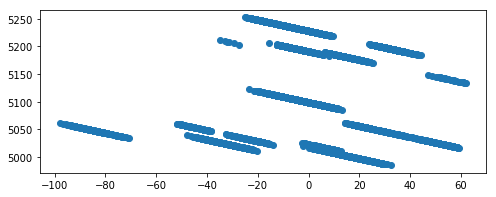

In [144]:
fig,ax=plt.subplots(figsize=(8,3))
residual=y_train-y_pred
_=ax.scatter(residual,y_pred)

It seems like the corresponding residual plot is reasonably random. 

****2. To confirm that, let’s go with a hypothesis test, Breusch-Pagan test, for linearity****

In [145]:
import statsmodels.stats.api as sms
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, X_train)
pval, f_pval

(0.0, 0.0)

Small p-value (pval below) shows that there is violation of homoscedasticity. Usually assumption violations are not independent of each other. Having one violations may lead to another. In this case, we see that both linearity and homoscedasticity are not met.

****3. Normality****

We apply normality probability plot to assess how the data (error) depart from normality visually.

0.8908480200507294

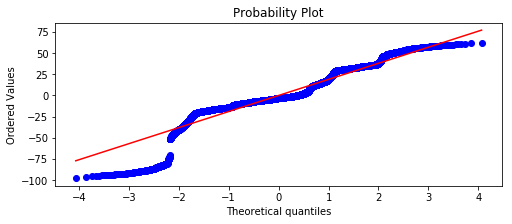

In [146]:
import scipy as sp
fig,ax=plt.subplots(figsize=(8,3))
_,(_,_,r)=sp.stats.probplot(residual,plot=ax, fit=True)
r**2

The good fit indicates that normality is a reasonable approximation

### Conclusion of Linear Regression:

- By observing all the three models, we can conclude that the relationship of the target variable with the features mentioned is significant. The significant features are as below: Age, marital, job, housing, loan, default, campaign, etc

- The results show that the model 1 and model 3 have better accuracy with respect to model 2.
- All three model makes sense.
- Model assumption violation have been calculated and displayed in the graphs for all three models.  
- For all three models cross validation gives good result, such that it is accurate.
- AIC,BIC and adjusted R^2 for Linear Model 1,2 and 3 is the least, highest and lower , hence model 1 is the one which should be choosen

# Logistic Regression

****Logistic regression, or logit regression****, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.)

Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities.

#### Logistic Regression: Model 1

In [147]:
df1=DF
df1.columns

Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_not.known', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'default_no', 'default_yes', 'y_no', 'y_yes'],
      dtype='object')

In [148]:
y_label_1l=df1['default_yes']
print(y_label_1l.shape)

df1.drop(['default_yes', 'default_no'],axis=1,inplace=True)


(41188,)


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y_label_1l, test_size = 0.3, random_state = 0)
clf = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)


# Calculating the probability of dependent variable
probability=clf.predict_proba(X_test)
probability_1=clf.predict_proba(X_test)[::,1] 
print(probability)
print(probability_1)

# Predicted the class of dependent variable 
predicted_class=clf.predict(X_test)
print(predicted_class)

# Calculating the accuracy 
Accuracy=clf.score(X_test, y_test)
print(Accuracy)


[[0.94621755 0.05378245]
 [0.48539912 0.51460088]
 [0.75361491 0.24638509]
 ...
 [0.88357312 0.11642688]
 [0.67917631 0.32082369]
 [0.77839594 0.22160406]]
[0.05378245 0.51460088 0.24638509 ... 0.11642688 0.32082369 0.22160406]
[0 1 0 ... 0 0 0]
0.7927490491219552


From below result we can see that the model is predicting the class for 1st row with probabilty of 0.95385016 for class 0 and 
0.04614984 for class 1. Hence, the class is 0

Accuracy is 79% for model 1

In [163]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.08388390310677744


#### Log Loss for logistic model 1:

****Cross-entropy loss, or Logarithmic loss (log loss)**** is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

A perfect model would have a log loss of 0.

In [151]:
from sklearn.metrics import log_loss
log_loss(y_test,probability)

0.44798380307382324

#### Area Under the ROC curve (AUC – ROC) for logistic model 1:

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. Learn more about ROC here.

ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

- Sensitivity is the true positive rate also called the recall. It is the number instances from the positive (first) class that actually predicted correctly.
- Specificity is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly.

Hence AUC itself is the ratio under the curve and the total area. 

0.7504099198965386


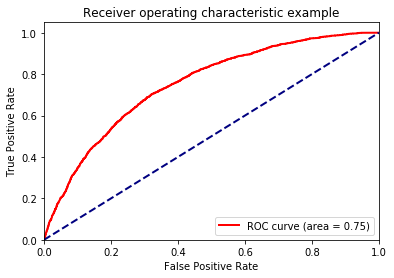

In [152]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,probability_1)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

You can see the the ROC curve area is 0.75, which is relatively good

#### Logistic Model: Model 2

In [153]:
df2=DF.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx','age'],axis=1,inplace=False)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y_label_1l, test_size = 0.3, random_state = 0)
clf = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)

# Calculated the probability of dependent variable
probability=clf.predict_proba(X_test)
probability_2=clf.predict_proba(X_test)[::,1] 
print(probability)
print(probability_2)

# Predicted the class of dependent variable
predicted_class=clf.predict(X_test)
print(predicted_class)

# Calculated the accuracy of model 2
Accuracy=clf.score(X_test, y_test)
print(Accuracy)

[[0.81641683 0.18358317]
 [0.52474193 0.47525807]
 [0.86193124 0.13806876]
 ...
 [0.90531099 0.09468901]
 [0.67524752 0.32475248]
 [0.85937318 0.14062682]]
[0.18358317 0.47525807 0.13806876 ... 0.09468901 0.32475248 0.14062682]
[0 0 0 ... 0 0 0]
0.7890264627336733


From the above result, we can see that the model is predicting the class for 1st row with probabilty of 0.84219289 for class 0 and 0.15780711 for class 1. Hence, the class is 0 for model 2.

Accuracy is 78.9% for model 2

In [155]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.07933162869496597


****Log Loss for Model 2:****

In [156]:
from sklearn.metrics import log_loss
log_loss(y_test,probability)

0.47408867746575656

****Area Under the ROC curve (AUC – ROC) for logistic model 2****:

0.7005887851069272


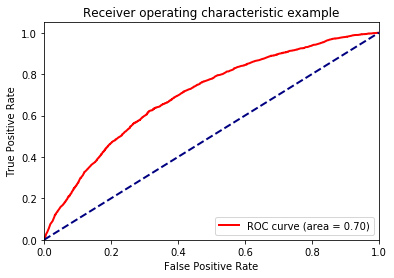

In [157]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probability_2)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

As you can see from the above graph, the ROC curve area is 0.70, which is less than model 1

#### Logistic Model: Model 3

In [158]:
df3=DF.drop(['housing_yes','housing_no','marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown','age','education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_not.known', 'education_professional.course',
       'education_university.degree'],axis=1,inplace=False)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, y_label_1l, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

clf = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)

# Calculated the probability of dependent variable
probability=clf.predict_proba(X_test)
probability_3=clf.predict_proba(X_test)[::,1] 
print(probability)
print(probability_3)

# Predicted the class of dependent variable
predicted_class=clf.predict(X_test)
print(predicted_class)

# Calculated the accuracy of model 2
Accuracy=clf.score(X_test, y_test)
print(Accuracy)

[[0.89271661 0.10728339]
 [0.59745999 0.40254001]
 [0.81589012 0.18410988]
 ...
 [0.87212272 0.12787728]
 [0.6854582  0.3145418 ]
 [0.88684497 0.11315503]]
[0.10728339 0.40254001 0.18410988 ... 0.12787728 0.3145418  0.11315503]
[0 0 0 ... 0 0 0]
0.7895120174799709


In [160]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.08388390310677744


From the above result, we can see that the model is predicting the class for 1st row with probabilty of 0.9370755 for class 0 and 0.0629245  for class 1. Hence, the class is 0 for model 3.

Accuracy is 78.9% for model 3

****Log Loss for Model 3:****

In [161]:
from sklearn.metrics import log_loss
log_loss(y_test,probability)

0.46997257086838606

****Area Under the ROC curve (AUC – ROC) for logistic model 3:****

0.7050804852207323


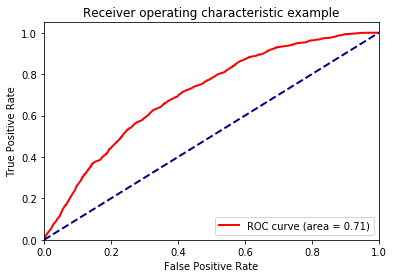

In [162]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probability_3)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

As you can see from the above graph, the ROC curve area is 0.71, which is less than model 1

### Conclusion of Logistic Regression

- By observing all the three models, we can conclude that the relationship of the target variable with the features mentioned is significant. The significant features are as below: Age, marital, job, housing, loan, default, campaign, etc
- The results show that the model 1 and model 3 have better accuracy with respect to model 2.
- All three model makes sense.
- For all three models cross validation gives good result, such that it is accurate.
- Log loss, AUC-ROC curve for Model 1,2 and 3 is calculated. According to that, model 1 is the one which should be choosen
- The probability of the dependent variable is calculated in all three models
- Depending on the accuracy calculated for all the three models, model 1 has the highest accuracy and best ROC curve area. Hence, model 1 should be choosen

## Multi-colinearity and step-wise regression:

Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. 

Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors.

In [173]:
df1=bank[feature_final1]
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df1['job']      = labelencoder_X.fit_transform(df1['job']) 
df1['marital']  = labelencoder_X.fit_transform(df1['marital']) 
df1['education']= labelencoder_X.fit_transform(df1['education']) 
df1['default']  = labelencoder_X.fit_transform(df1['default']) 
df1['housing']  = labelencoder_X.fit_transform(df1['housing']) 
df1['loan']     = labelencoder_X.fit_transform(df1['loan']) 
df1['y']     = labelencoder_X.fit_transform(df1['y']) 

df1.columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'default', 'age',
       'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y',
       'nr.employed'],
      dtype='object')

****The Variance Inflation Factor (VIF)**** is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns

In [175]:
vif.round(1)

,VIF Factor,features
0,2.1,job
1,5.6,marital
2,4.1,education
3,2.2,housing
4,1.2,loan
5,1.4,default
6,19.6,age
7,1.9,campaign
8,2.0,emp.var.rate
9,12944.2,cons.price.idx


As expected, the ****cons.price.idx**** and ****cons.conf.idx**** have a high variance inflation factor because they "explain" the same variance within this dataset. 

We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.

In [176]:
df_1=df1.drop(['cons.price.idx','emp.var.rate'],axis=1,inplace=False)

## Conclusion of Multi-colinearity:

1. Is there any multi-colinearity in the model?    
 -  Yes, the model which is being considered, has multi-colinearity 
2. In the multiple regression models are predictor variables independent of all the other predictor variables?
 -  No, the predictor variables are not independent of all the other predictor variables
3. In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
 -  Rank - loan, job, housing,education, marital for DF1
 -  Rank - loan, y, job, contact, day_of_week, education for DF2
 -  Rank - y, job, housing, duration, contact, day_of_week for DF3
(VIF is calculated and displayed only for DF1)

****Cross-validation****

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(df1_lin, y_label_1, test_size = 0.3, random_state = 0)

model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))


# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

value of Accuracy_train:  0.922477
value of Accuracy_test:  0.920251
0.9222956963707162


4. Cross-validate the models. How well did they do?  
 - One of the linear models have been cross-validated. It has done well with accuracy of 0.92

### Interaction effect:

In statistics, an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the effect of one causal variable on an outcome depends on the state of a second causal variable (that is, when effects of the two causes are not additive).

The presence of interactions can have important implications for the interpretation of statistical models. If two variables of interest interact, the relationship between each of the interacting variables and a third "dependent variable" depends on the value of the other interacting variable.

****Interaction effect of model 1:****

In [178]:
df_int3 = df1['education'] * df1['loan']

In [180]:
DF_F=pd.concat([df1_lin,df_int3], axis=1)

print(DF_F.shape)

(41188, 36)


In [181]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(DF_F, y_label_1, test_size = 0.3, random_state = 0)


model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.922477
value of Accuracy_test:  0.920248


rmse_train: 20.105003488444314 msle_train: 1.5513436451485408e-05
rmse_test: 20.43148612746953 msle_test: 1.603982863199972e-05


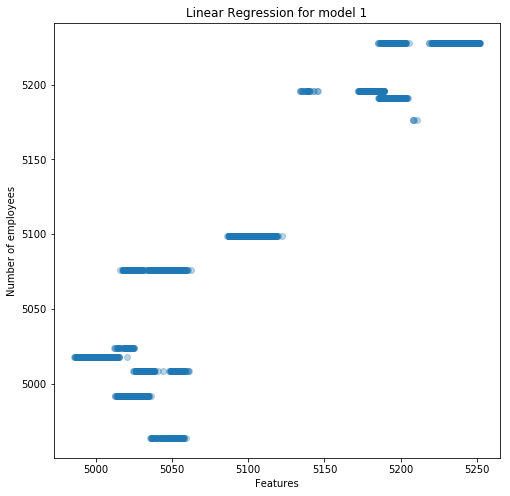

In [182]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
plt.figure(figsize=(8,8))
plt.scatter(test_pred_Y ,y_test ,alpha = 0.3)
plt.xlabel('Features')
plt.ylabel('Number of employees')
plt.title("Linear Regression for model 1")
plt.show()

From the interaction effect performed on model 1 (by considering education and loan product term), we can conclude that there was no major effect of the product term,i.e. there is no significant synergy observed as the accuracy of the model with and without product term being involved is 92.2%

Let us consider two more variables for interaction effect to be performed on model 2.

#### Interaction effect of model 2:

In [196]:
df_int = df1['marital'] * df1['loan']

In [197]:
DF_DF=pd.concat([df1_lin,df_int], axis=1)

print(DF_DF.shape)

(41188, 36)


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(DF_DF, y_label_1, test_size = 0.3, random_state = 0)


model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.922487
value of Accuracy_test:  0.920258


rmse_train: 20.103673511940432 msle_train: 1.5511320342045724e-05
rmse_test: 20.430267441909585 msle_test: 1.6037701497109535e-05


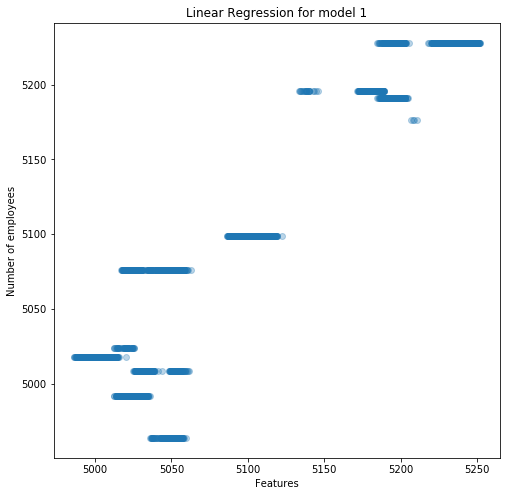

In [199]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
plt.figure(figsize=(8,8))
plt.scatter(test_pred_Y ,y_test ,alpha = 0.3)
plt.xlabel('Features')
plt.ylabel('Number of employees')
plt.title("Linear Regression for model 1")
plt.show()

From the interaction effect performed on model 2 (by considering education and loan product term), we can conclude that there was no major effect of the product term,i.e. there is no significant synergy observed as the accuracy of the model with and without product term being involved is 92.2%

### Regularization:

Regularization, significantly reduces the variance of the model, without substantial increase in its bias.

Regularization is a technique that helps in avoiding overfitting and also increasing model interpretability.

L2 Regularization has been performed below and the output is compared with non-regularized linear regression in the form of graph.

0.9224741012116655
0.9224769442158579
0.9224769436349998
0.9224769426736582
0.9224769413371336
0.9224769396305376
0.9224769375587959
0.9224769351266571
0.9224769323387041
0.9224769291993541
0.9224769257128678


Text(0.5, 1.0, 'Alpha vs Accuracy')

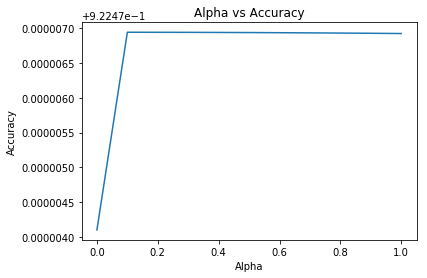

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(df1_lin, y_label_1, test_size = 0.3, random_state = 0)


from sklearn.linear_model import Ridge
Accuracy=[]
Alpha=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

model = LinearRegression(normalize=True)

for i in range(0,110,10):

    model = Ridge(alpha=0.01*i)# applied regularization(Ridge)
    model.fit(X_train, y_train)
    accuracy=model.score(X_train,y_train)
    print(accuracy)
    
    Accuracy.append(accuracy)


plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.plot(Alpha,Accuracy)
plt.title("Alpha vs Accuracy")


From the graph, we can observe that the accuracy is constant after alpha > 0.1. 

## Conclusion:

#### a. Conclusion of Linear Regression:

- By observing all the three models, we can conclude that the relationship of the target variable with the features mentioned is significant. The significant features are as below: Age, marital, job, housing, loan, default, campaign, etc
- The results show that the model 1 and model 3 have better accuracy with respect to model 2
- All three model makes sense
- Model assumption violation have been calculated and displayed in the graphs for all three models 
- For all three models cross validation gives good result, such that it is accurate
- AIC,BIC and adjusted R^2 for Linear Model 1,2 and 3 is the least, highest and lower , hence model 1 is the one which should be choosen

#### b. Conclusion of Logistic Regression:

- By observing all the three models, we can conclude that the relationship of the target variable with the features mentioned is significant. The significant features are as below: Age, marital, job, housing, loan, default, campaign, etc
- The results show that the model 1 and model 3 have better accuracy with respect to model 2
- All three model makes sense
- For all three models cross validation gives good result, such that it is accurate
- Log loss, AUC-ROC curve for Model 1,2 and 3 is calculated. According to that, model 1 is the one which should be choosen
- The probability of the dependent variable is calculated in all three models
- Depending on the accuracy calculated for all the three models, model 1 has the highest accuracy and best ROC curve area.Hence, model 1 should be choosen

#### c. Conclusion of Multi-colinearity 
1. Is there any multi-colinearity in the model? 
 -  Yes, the model which is being considered, has multi-colinearity 
2. In the multiple regression models are predictor variables independent of all the other predictor variables?
 -  No, the predictor variables are not independent of all the other predictor variables
3. In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
 -  Rank - loan, job, housing,education, marital for DF1
 -  Rank - loan, y, job, contact, day_of_week, education for DF2
 -  Rank - y, job, housing, duration, contact, day_of_week for DF3 (VIF is calculated and displayed only for DF1)

#### d. Conclusion of Interaction effect:

From the interaction effect performed on model 1 and 2 (by considering education * job and education * loan product terma), we can conclude that there was no major effect of the product term,i.e. there is no significant synergy observed as the accuracy of the model with and without product term being involved is 92.2%

#### e. Conclusion of Regularization:

From the graph, we can observe that the accuracy is constant after alpha > 0.1

It is to be observed from the modeling methods that the training accuracy and testing accuracy have been almost the same. 
Hence, the model is not overfitting.

### Contribution

- The Dataset had many unknown values , cleaning of data was done by me. 
- Initial EDA was performed on the dataset so that the dataset is clean before performing any regression. 
- Linear and Logistic regression was performed and the code was referenced from the Kernel of the Kaggle website. 
- Performed multi-colinearity on the linear model, cross-validated all the models 
- The interaction effect was calculated and the result was compared with the original model with product term
- Significance of the independent variables was calculated on the dependent variable
- Ridge Regularization was performed on the model. 
- On the whole, I contributed 70% to the assignment in terms of coding.

### Citations

1. https://www.kaggle.com/heisenberg14/bank-marketing-with-machine-learning-analysis
2. https://etav.github.io/python/vif_factor_python.html
3. http://statisticsbyjim.com/regression/interaction-effects/
4. https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/#Contents
5. https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
6. https://www.ritchieng.com/machinelearning-one-hot-encoding/
7. https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

### License

Copyright (c) 2019 Sindhu Raghavendra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.